Welcome, and thank you for opening this Notebook.
This Notebook will provide knowledge to novice Data Scientists with basic Machine Learning concepts like - 
1. Data Exploratory Ananlysis
2. Principle Component Analysis
3. Prediction and Model selection

*In this notebook, First I have done some exploration on the data using matplotlib and seaborn.
Then, I use different classifier models to predict the quality of the wine.*

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
data  = pd.read_csv('winequality-red.csv',sep =';')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
corr=data.corr()

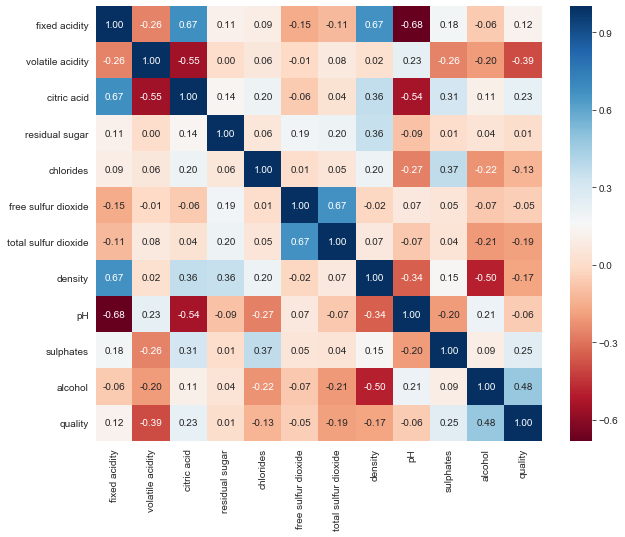

In [9]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='RdBu',annot=True,fmt='.2f')


In [10]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

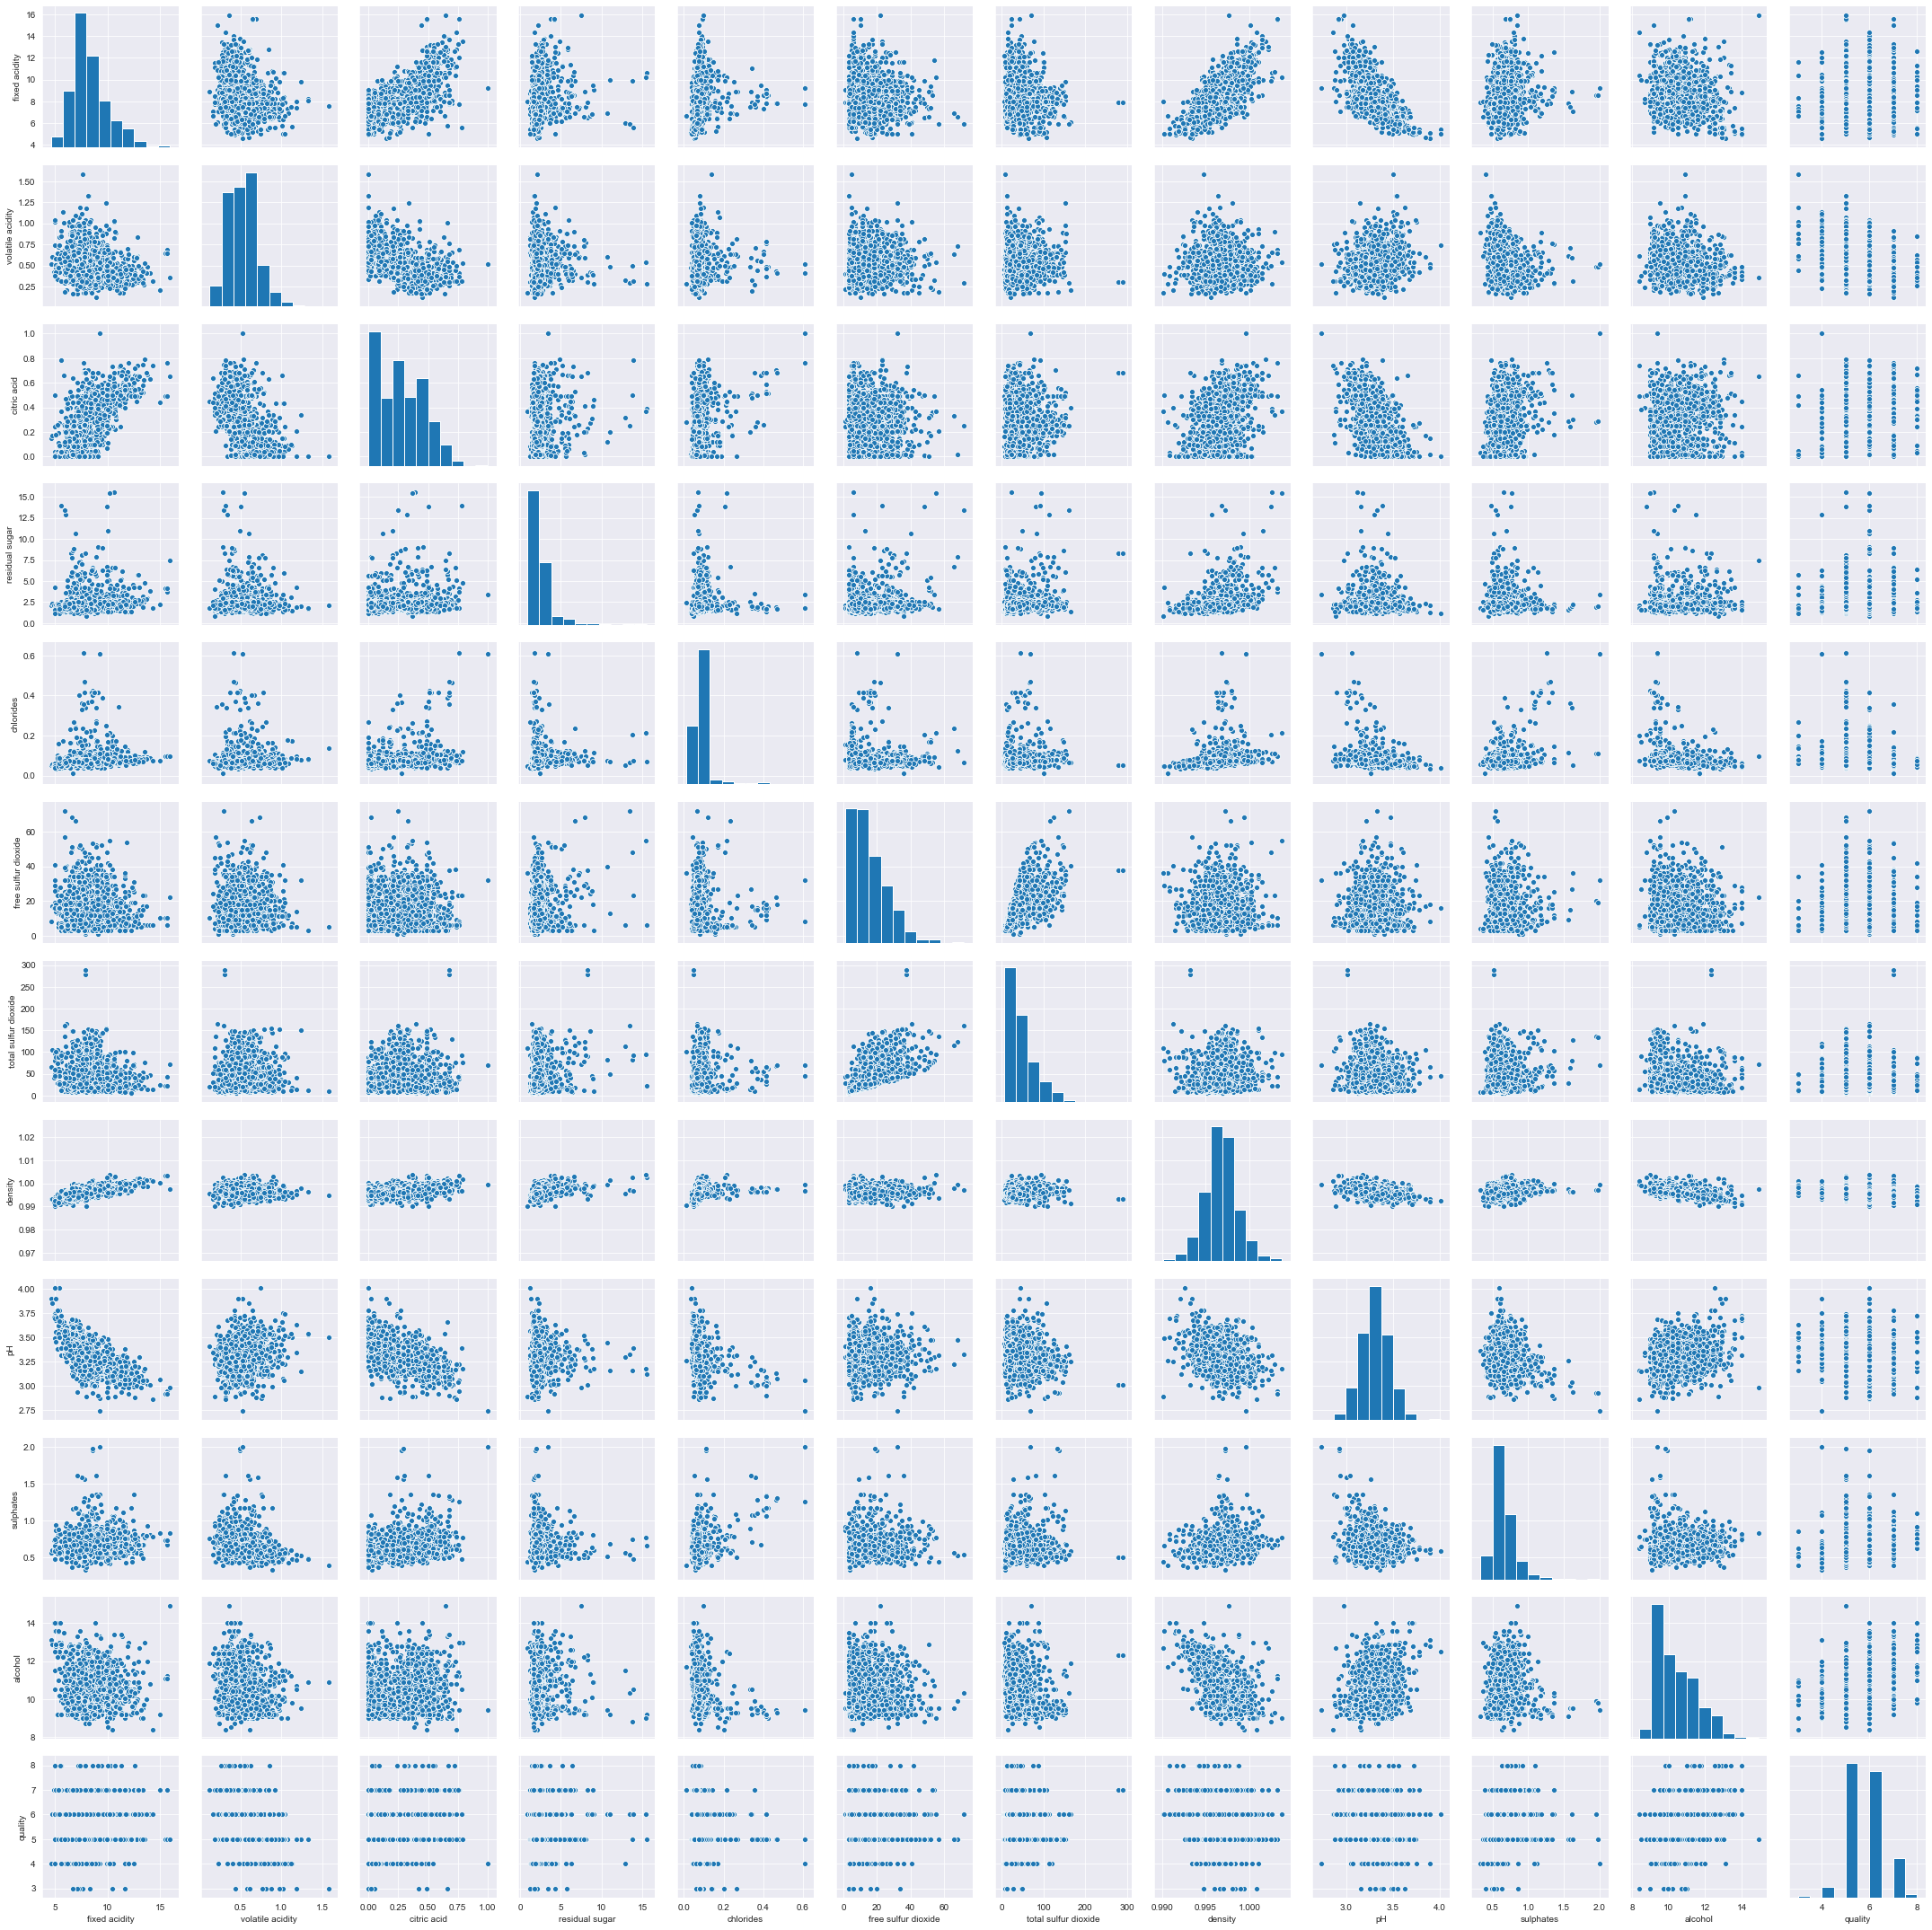

In [12]:
#check correlation between the variables using Seaborn's pairplot 
sns.pairplot(data)

No correlation between the fields as seen on the pairplot

In [13]:
#count of each target variable
from collections import Counter
ctr=Counter(data['quality'])

In [14]:
print(ctr)

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})


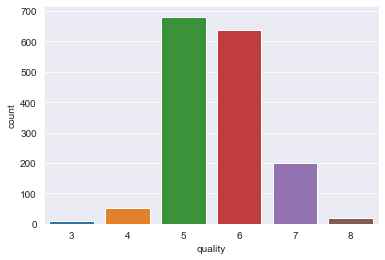

In [15]:
#count the target variable
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
sns.countplot(x ='quality',data=data)

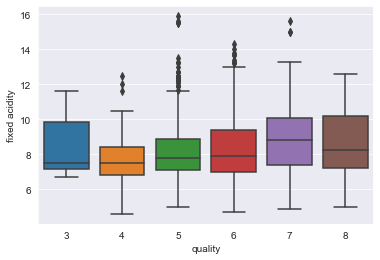

In [16]:
#plot a boxplot to check for outliers
#Target variable is quality. so will plot a boxplot each column against target variable
#for an interactive plot,use the code below
#data.iplot(kind ='box',x ='quality',y='fixed acidity')
sns.boxplot(x='quality',y = 'fixed acidity', data = data)

## **Let's do some plotting to know how the data columns are distributed in the dataset**

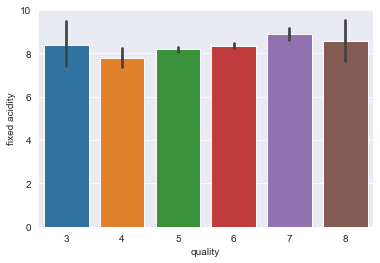

In [17]:
#here we see that fixed acidity does not give any specification to classify the quality 
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

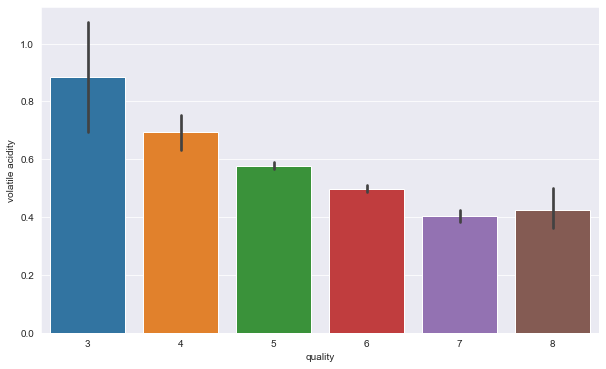

In [18]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

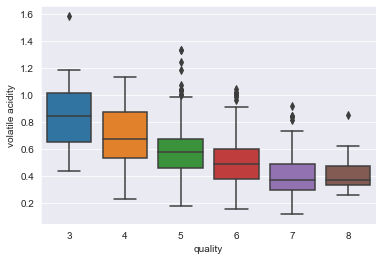

In [19]:
sns.boxplot('quality','volatile acidity',data =data)

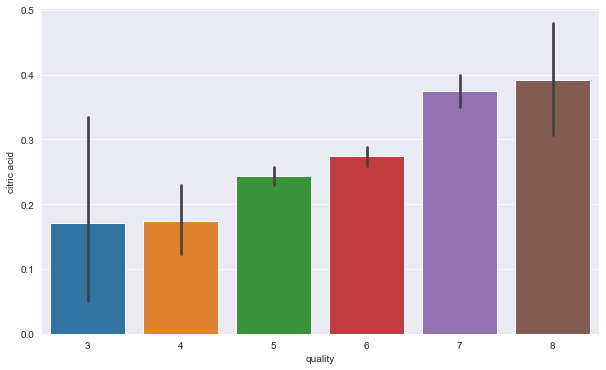

In [20]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

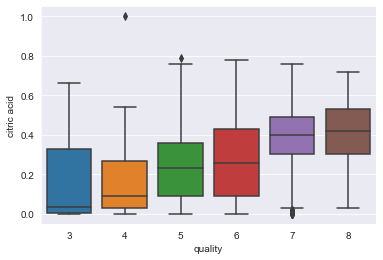

In [42]:
sns.boxplot('quality', 'citric acid', data = data)

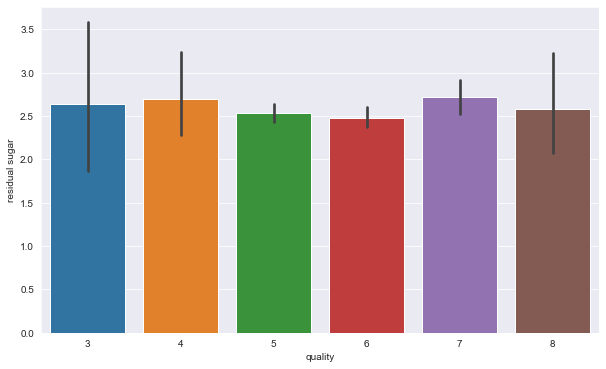

In [22]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

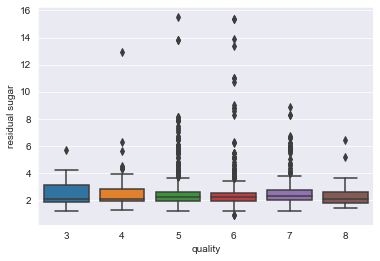

In [23]:
sns.boxplot('quality', 'residual sugar', data = data)

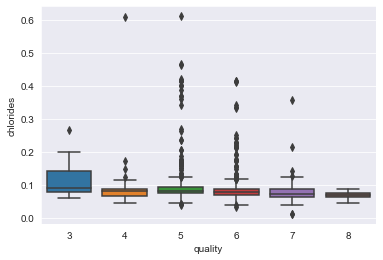

In [24]:
sns.boxplot('quality', 'chlorides', data = data)

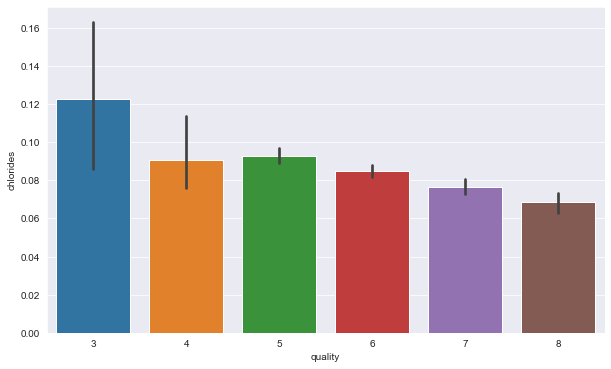

In [25]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

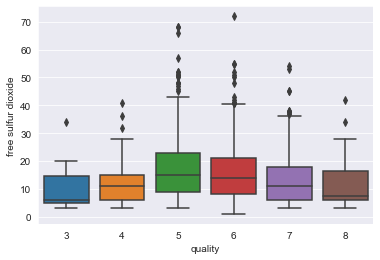

In [26]:
sns.boxplot('quality', 'free sulfur dioxide', data = data)

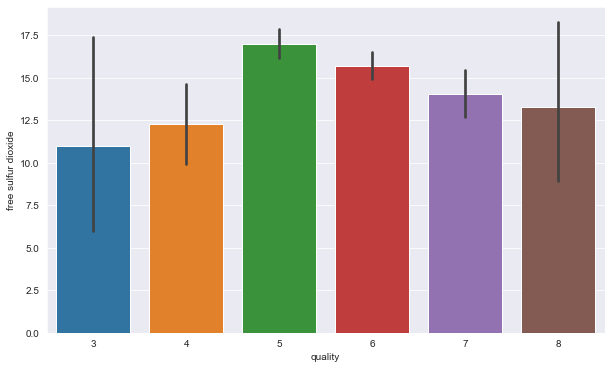

In [27]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

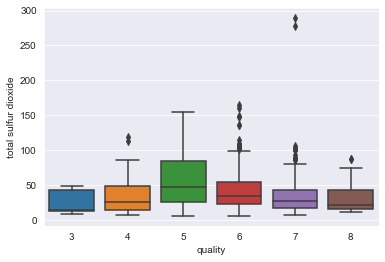

In [28]:
sns.boxplot('quality', 'total sulfur dioxide', data = data)

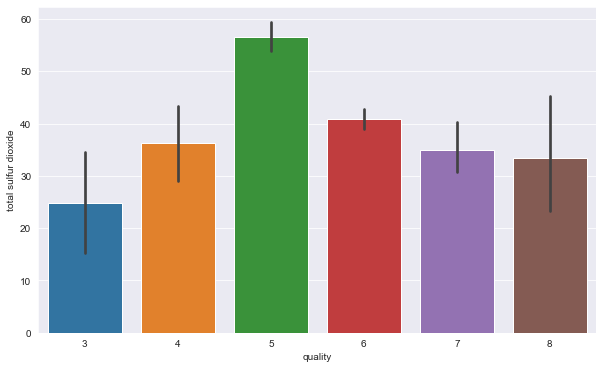

In [29]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)

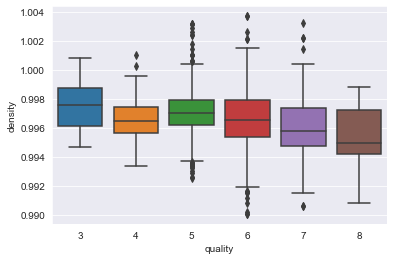

In [30]:
sns.boxplot('quality', 'density', data = data)

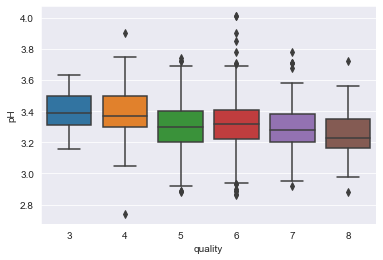

In [31]:
sns.boxplot('quality', 'pH', data = data)

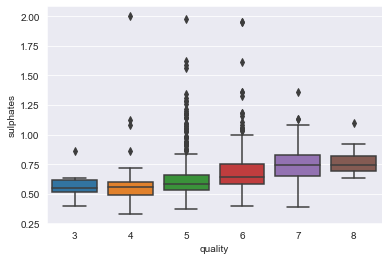

In [32]:
sns.boxplot('quality', 'sulphates', data = data)

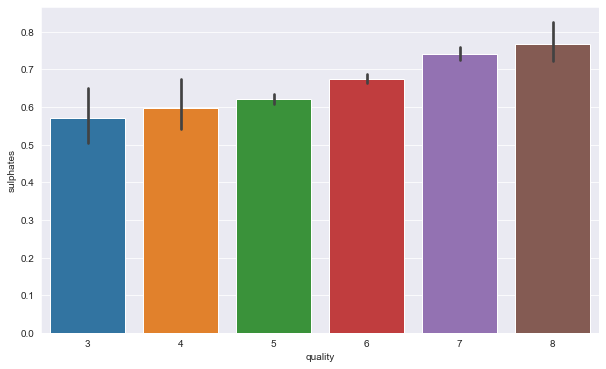

In [33]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

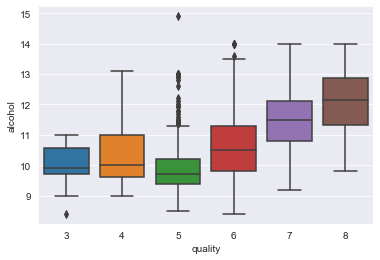

In [34]:
sns.boxplot('quality', 'alcohol', data = data)

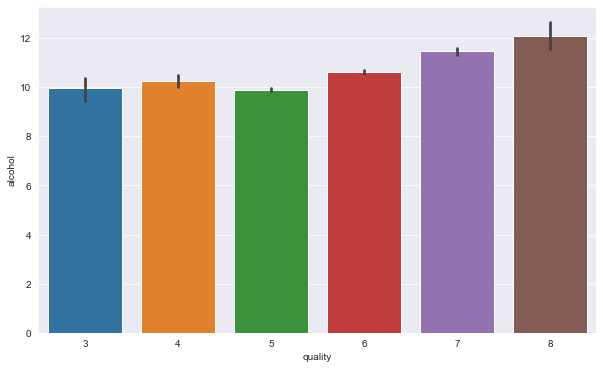

In [35]:
#Alcohol level also goes higher as the quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = data)

In [39]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [41]:
#boxplots show many outliers for quite a few columns.describe the dataset to get a better idea on what's happening
#fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers
#volatile acididty - similar reasoning
#citric acid - seems to be somewhat uniformly distributed
#residual sugar - min - 0.9, max - 15!! Waaaaay too much difference. Could explain the outliers.
#chlorides - same as residual sugar. Min - 0.012, max - 0.611
#free sulfur dioxide, total suflur dioxide - same explanation as above

In [49]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
data['Reviews'] = reviews

In [50]:
#view final data
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

In [51]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [52]:
data['Reviews'].unique()

array(['2', '3', '1'], dtype=object)

In [54]:
Counter(data['Reviews'])

Counter({'2': 1571, '3': 18, '1': 10})

Split the X and Y variables

In [55]:
X = data.iloc[:,:11]
y = data['Reviews']

In [56]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [57]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Reviews, dtype: object

Now scale the data using StandardScalar for PCA

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [59]:
#view the scaled features
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


Proceed to perform PCA

In [60]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

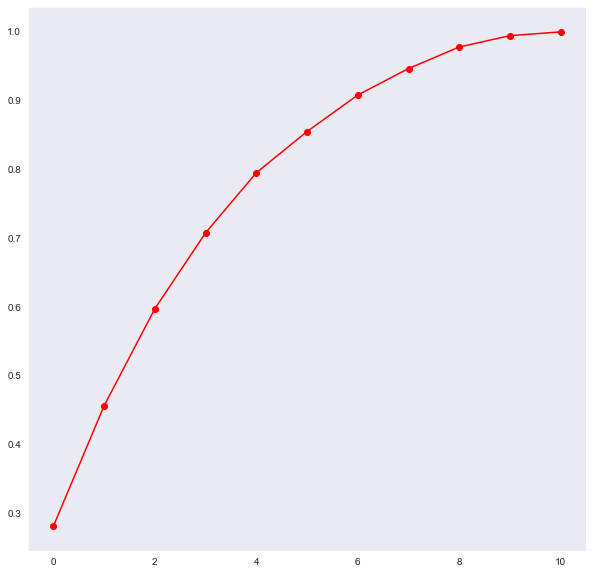

In [63]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.grid()

In [64]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [65]:
print(x_new)

[[-1.61952988  0.45095009 -1.77445415 ... -0.91392069 -0.16104319
  -0.28225828]
 [-0.79916993  1.85655306 -0.91169017 ...  0.92971392 -1.00982858
   0.76258697]
 [-0.74847909  0.88203886 -1.17139423 ...  0.40147313 -0.53955348
   0.59794606]
 ...
 [-1.45612897  0.31174559  1.12423941 ... -0.50640956 -0.23108221
   0.07938219]
 [-2.27051793  0.97979111  0.62796456 ... -0.86040762 -0.32148695
  -0.46887589]
 [-0.42697475 -0.53669021  1.6289552  ... -0.49615364  1.18913227
   0.04217568]]


Split the data into train and test data

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [70]:
print(X_train.shape,'\n')
print(y_train.shape,'\n')
print(X_test.shape,'\n')
print(y_test.shape,'\n')

(1199, 8) 

(1199,) 

(400, 8) 

(400,) 



Proceed with Modelling.
We will use the following algorithms 
1. Logistic Regression
2. Decision Trees
3. Naive Bayes
4. Random Forests
5. SVM

1. Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
lr = LogisticRegression(multi_class='multinomial',solver='newton-cg')
lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)

In [76]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test,lr_predict)
lr_acc_score = accuracy_score(y_test,lr_predict)
lr_class_report = classification_report(y_test,lr_predict)
print(lr_conf_matrix,'\n')
print(lr_acc_score*100,'\n')
print(lr_class_report,'\n')

[[  0   3   0]
 [  0 394   0]
 [  0   3   0]] 

98.5 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.98      1.00      0.99       394
           3       0.00      0.00      0.00         3

    accuracy                           0.98       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.97      0.98      0.98       400
 



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



98% accuracy with Logistic Regression! Let's see of Decision Trees give us a better accuracy

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [81]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test,dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
dt_class_report = classification_report(y_test,dt_predict)
print(dt_conf_matrix,'\n')
print(dt_acc_score*100,'\n')
print(dt_class_report,'\n')

[[  1   2   0]
 [  2 388   4]
 [  0   3   0]] 

97.25 

              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.99      0.98      0.99       394
           3       0.00      0.00      0.00         3

    accuracy                           0.97       400
   macro avg       0.44      0.44      0.44       400
weighted avg       0.97      0.97      0.97       400
 



Lesser accuracy with Decision Tree! Let's Use NaiveBayes

In [82]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict = nb.predict(X_test)

In [83]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
nb_class_rep = classification_report(y_test,nb_predict)
print(nb_conf_matrix,'\n')
print(nb_acc_score*100,'\n')
print(nb_class_rep,'\n')

[[  1   2   0]
 [  6 385   3]
 [  0   3   0]] 

96.5 

              precision    recall  f1-score   support

           1       0.14      0.33      0.20         3
           2       0.99      0.98      0.98       394
           3       0.00      0.00      0.00         3

    accuracy                           0.96       400
   macro avg       0.38      0.44      0.39       400
weighted avg       0.97      0.96      0.97       400
 



Similar accuracy as Decision Tree. Let's use RandomForest classifier now.

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [86]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
rf_class_rep = classification_report(y_test,rf_predict)
print(rf_conf_matrix,'\n')
print(rf_acc_score*100,'\n')
print(rf_class_rep,'\n')

[[  0   3   0]
 [  0 394   0]
 [  0   3   0]] 

98.5 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.98      1.00      0.99       394
           3       0.00      0.00      0.00         3

    accuracy                           0.98       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.97      0.98      0.98       400
 



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



98% accuracy! Improvement from Decision Tree and Naive Bayes but the same as Logistic Regression Classifier

SVM Classifier

In [87]:
from sklearn.svm import SVC

In [90]:
#we shall use the rbf kernel first and check the accuracy
lin_svc = SVC()
lin_svc.fit(X_train, y_train)
lin_svc=rf.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [91]:
#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
lin_class_rep = classification_report(y_test,rf_predict)
print(lin_svc_conf_matrix,'\n')
print(lin_svc_acc_score*100,'\n')
print(lin_class_rep,'\n')

[[  0   3   0]
 [  0 394   0]
 [  0   3   0]] 

98.5 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.98      1.00      0.99       394
           3       0.00      0.00      0.00         3

    accuracy                           0.98       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.97      0.98      0.98       400
 



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



98.5% accuracy wit RBF Kernel! Same as Random Forest! Let's try the linear kernel now and see if it improves our accuracy in any way.

In [92]:
rbf_svc = SVC(kernel='linear')
rbf_svc.fit(X_train,y_train)
rbf_svc = rf.predict(X_test)


In [93]:
rbf_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
rbf_svc_acc_score = accuracy_score(y_test, rf_predict)
rbf_class_rep = classification_report(y_test,rf_predict)
print(rbf_svc_conf_matrix,'\n')
print(rbf_svc_acc_score*100,'\n')
print(rbf_class_rep,'\n')

[[  0   3   0]
 [  0 394   0]
 [  0   3   0]] 

98.5 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.98      1.00      0.99       394
           3       0.00      0.00      0.00         3

    accuracy                           0.98       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.97      0.98      0.98       400
 



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



The same accuracy! So we can see that the SVC and the Random Forest give us good prediction accuracy for the Wine Classification problem.

**We can further improve accuracy by fine-tuning the parameters of each classifier.**

Hope you found this Kernel useful! Please leave in comments in case of any questions, concerns, and feedback! Thank you :) 

In [94]:
set(y_test) - set(rf_predict)

{'1', '3'}

The above errors of **Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples** occur because some labels in y_test(true) don't appear in y_pred

This means that there is no F-score to calculate for this label, and thus the F-score for this case is considered to be 0.0

**This problem is brought about by the imbalanced multi-class target variables**

**How about we model the Target Variables into a Binary Classification problem, would this help??**

Let's find out...


## Preprocessing Data for performing Machine learning algorithms

In [95]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [96]:
#making binary classification for the response variable
#dividing wine as good and bad by giving the limit for the quality

bins = (2,6.5,8)
group_names = ['bad','good']
data['quality'] = pd.cut(data['quality'],bins=bins,labels=group_names)


In [97]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,2


In [99]:
from sklearn.preprocessing import LabelEncoder
#Now let's assign labels to our quality variable
label_quality = LabelEncoder()

In [100]:
data['quality'] = label_quality.fit_transform(data['quality'])

In [101]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

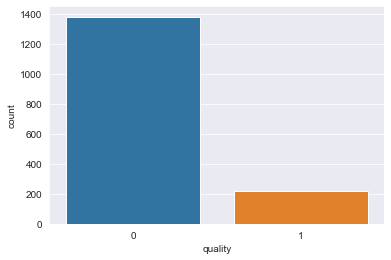

In [103]:
sns.countplot(x='quality',data=data)
#sns.countplot(data['quality'])

In [104]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,2


In [105]:
#Now separate the dataset as responce variable and feature variables
X = data.drop(['quality','Reviews'],axis = 1)
y = data['quality']

In [108]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [111]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
#Applying Standard scaling to get optimized result
sc =StandardScaler()

In [114]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

We can now model our data using machine learning algorithmns

### Random Forest Classifier

In [115]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [118]:
#Let's see how our model performed
print(accuracy_score(y_test,pred_rfc),'\n')
print(confusion_matrix(y_test,pred_rfc),'\n')
print(classification_report(y_test, pred_rfc),'\n')

0.9 

[[267   6]
 [ 26  21]] 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       273
           1       0.78      0.45      0.57        47

    accuracy                           0.90       320
   macro avg       0.84      0.71      0.76       320
weighted avg       0.89      0.90      0.89       320
 



#### Random forest gives the accuracy of 90%

## Stochastic Gradient Decent Classifier

In [120]:
from sklearn.linear_model import SGDClassifier

In [122]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train,y_train)
pred_sgd = sgd.predict(X_test)

In [125]:
print(classification_report(y_test,pred_sgd),'\n')
print(confusion_matrix(y_test,pred_sgd),'\n')
print(accuracy_score(y_test,pred_sgd),'\n')

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       273
           1       0.52      0.68      0.59        47

    accuracy                           0.86       320
   macro avg       0.73      0.79      0.75       320
weighted avg       0.88      0.86      0.87       320
 

[[244  29]
 [ 15  32]] 

0.8625 



**86% accuracy using stochastic gradient descent classifier**

## Support Vector Classifier

In [126]:
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)

In [127]:
print(classification_report(y_test,pred_svc),'\n')
print(confusion_matrix(y_test,pred_svc),'\n')
print(accuracy_score(y_test,pred_svc),'\n')

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320
 

[[268   5]
 [ 35  12]] 

0.875 



**Support Vector Classifier gets 88% accuracy**

## Let's try to increase our accuracy of models
## Grid Search CV

Use cross validation evaluation technique to optimize the model performance.

In [129]:
from sklearn.model_selection import GridSearchCV
#Finding best parameters for our SVC model
param = {
    'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc,param_grid=param,scoring='accuracy',cv=10)


In [130]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [131]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [132]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C=1.2,gamma=0.9,kernel='rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2),'\n')
print(confusion_matrix(y_test,pred_svc2),'\n')
print(accuracy_score(y_test,pred_svc2),'\n')

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320
 

[[271   2]
 [ 31  16]] 

0.896875 



### SVC improves from 88% to 90% using Grid Search CV

 **Cross Validation Score for random forest and SGD**
 
 **The Cross Validation Score has been used to optimize the model perfromance**

In [135]:
from sklearn.model_selection import cross_val_score
#now lets try to do some evaluation for random forestmodel using cross validation
rfc_eval = cross_val_score(estimator=rfc, X=X_train,y = y_train, cv=10)
rfc_eval.mean()

0.9116695374015749

**Random Forest accuracy increases from 90% to 91% using cross validation score**

### Thank for going through this notebook